# **Model Evaluation**

**Task 4: Model Evaluation**

In [106]:
# Import necessary libraries
import joblib
import pandas as pd
from sklearn.linear_model import LinearRegression

# Load the training dataset with selected features
train_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_train_selected.csv')

# Separate features and target variable
X_train = train_data.drop(columns=['medv'])
y_train = train_data['medv']

# Create and fit the model
best_model = LinearRegression(fit_intercept=False)
best_model.fit(X_train, y_train) # This line is crucial: it trains the model

# Now save the fitted model
joblib.dump(best_model, 'drive/MyDrive/Datasets/linear_regression_best_model_saved.pkl')

print("Best model trained and saved successfully.")

Best model trained and saved successfully.


In [109]:
# Evaluate the model using metrics such as Mean Squared Error (MSE), R-squared
# Import necessary libraries
import pandas as pd
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the testing dataset with selected features
test_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_test_selected.csv')

# Separate features and target variable
X_test = test_data.drop(columns=['medv'])
y_test = test_data['medv']

# Load the trained model
best_model = joblib.load('drive/MyDrive/Datasets/linear_regression_best_model_saved.pkl')

# Make predictions on the test set using the best model
y_pred = best_model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

# Display the evaluation metrics
# Use the built-in round() function to round the MSE value
print("Mean Squared Error (MSE):", round(mse, 4))
print("R-squared (R2) Score:", round(r2, 4))

Mean Squared Error (MSE): 29.2645
R-squared (R2) Score: 0.5976


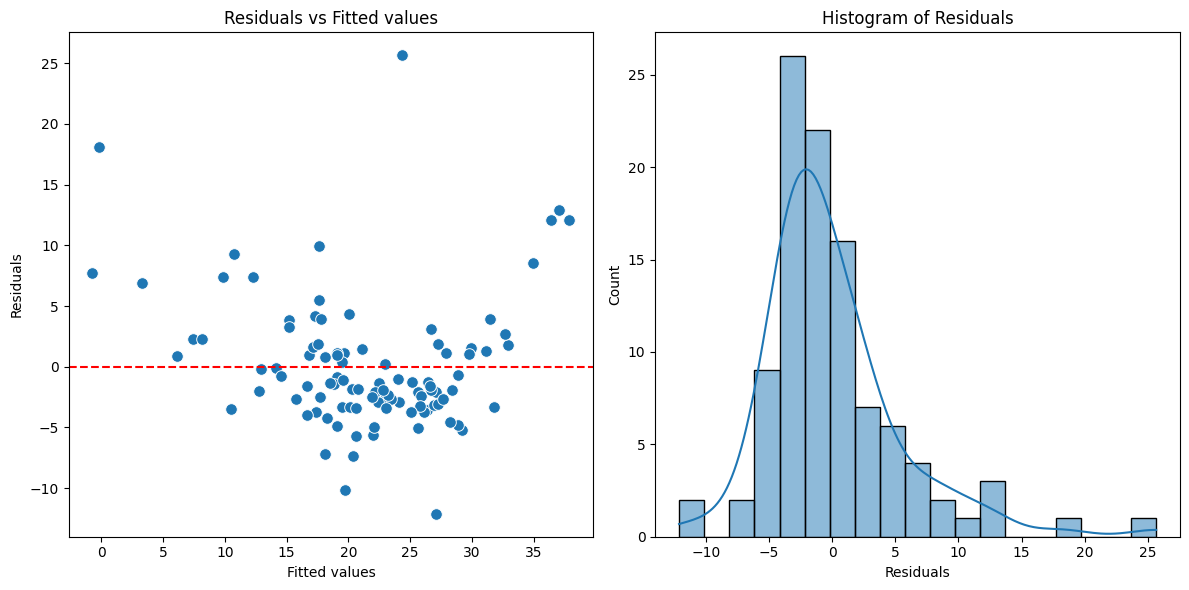

In [110]:
# Import necessary libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate residuals
residuals = y_test - y_pred

# Plot residuals
plt.figure(figsize=(12, 6))

# Residuals vs Fitted values
plt.subplot(1, 2, 1)
sns.scatterplot(x=y_pred, y=residuals, edgecolor='w', s=70)
plt.axhline(0, color='r', linestyle='--')
plt.xlabel('Fitted values')
plt.ylabel('Residuals')
plt.title('Residuals vs Fitted values')

# Q-Q plot
plt.subplot(1, 2, 2)
sns.histplot(residuals, kde=True)
plt.xlabel('Residuals')
plt.title('Histogram of Residuals')

plt.tight_layout()
plt.show()

In [111]:
# Compare model performance with different feature sets or preprocessing steps
# Import necessary libraries
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.metrics import mean_squared_error, r2_score
import joblib

# Load the datasets
train_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_train.csv')
test_data = pd.read_csv('drive/MyDrive/Datasets/BostonHousing_test.csv')

# Define feature sets
feature_sets = [
    ['rm', 'lstat'],
    ['rm', 'lstat', 'age'],
    ['rm', 'lstat', 'age', 'tax']
]

# Define preprocessing steps
preprocessing_steps = ['none', 'standard', 'minmax']

# Function to preprocess the data
def preprocess_data(X_train, X_test, method):
    if method == 'standard':
        scaler = StandardScaler()
    elif method == 'minmax':
        scaler = MinMaxScaler()
    else:
        return X_train, X_test

    X_train_scaled = scaler.fit_transform(X_train)
    X_test_scaled = scaler.transform(X_test)

    return X_train_scaled, X_test_scaled

# Collect performance metrics
results = []

for features in feature_sets:
    for method in preprocessing_steps:
        # Prepare training and testing data
        X_train = train_data[features]
        y_train = train_data['medv']
        X_test = test_data[features]
        y_test = test_data['medv']

        # Preprocess data
        X_train_preprocessed, X_test_preprocessed = preprocess_data(X_train, X_test, method)

        # Train the model
        model = LinearRegression(fit_intercept=False)
        model.fit(X_train_preprocessed, y_train)

        # Make predictions
        y_pred = model.predict(X_test_preprocessed)

        # Evaluate the model
        mse = mean_squared_error(y_test, y_pred)
        r2 = r2_score(y_test, y_pred)

        # Store the results
        results.append({
            'features': features,
            'preprocessing': method,
            'mse': mse,
            'r2': r2
        })

# Convert the results to a DataFrame for better visualization
results_df = pd.DataFrame(results)
print(results_df)

# Save the results to a CSV file
results_df.to_csv('drive/MyDrive/Datasets/model_performance_comparison.csv', index=False)

                features preprocessing         mse        r2
0            [rm, lstat]          none   29.264506  0.597559
1            [rm, lstat]      standard  556.260841 -6.649616
2            [rm, lstat]        minmax   47.635010  0.344930
3       [rm, lstat, age]          none   29.433558  0.595234
4       [rm, lstat, age]      standard  557.064584 -6.660669
5       [rm, lstat, age]        minmax   47.764496  0.343150
6  [rm, lstat, age, tax]          none   28.796225  0.603999
7  [rm, lstat, age, tax]      standard  560.586099 -6.709096
8  [rm, lstat, age, tax]        minmax   46.894234  0.355118


- The models trained without any preprocessing (scaling) have shown relatively good performance in terms of MSE and R-squared values.
- The best performance is observed with the feature set [rm, lstat, age, tax], yielding an MSE of 28.796225 and an R2 of 0.603999.

- The results indicate that no preprocessing (scaling) yields the best performance for this dataset and model. Therefore, it is recommended to proceed without scaling the features.